In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("cust_satisfaction.csv")
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df = df.dropna()

In [7]:
df3 = pd.get_dummies(df , drop_first = 'if_binary').astype('int') # One Hot Encoding Representation
df3.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [8]:
## Independent variable and dependent variables (X and Y)
x = df3.drop('satisfaction_satisfied', axis = 1)
x

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,5,4,5,25,18,1,0,1,0,1
1,25,235,1,3,1,1,6,1,1,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0
3,25,562,2,3,2,11,9,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0
103901,30,1995,4,4,4,7,14,1,1,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0


In [9]:
y = df3[['satisfaction_satisfied']]
y

,satisfaction_satisfied
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier()

In [14]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
# Model performance (model evaluation)
print("Training Score :",round(dt.score(x_train,y_train),4)*100,"%")
print("Testing Score :",round(dt.score(x_test,y_test),4)*100,"%")

Training Score : 99.97 %
Testing Score : 81.53 %


In [16]:
prediction = dt.predict(x_test)

In [17]:
y_test['satisfaction_prediction'] = prediction

In [18]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [19]:
matrix = confusion_matrix(y_test['satisfaction_satisfied'] ,y_test['satisfaction_prediction'] ) # ACTUAL VALUE PREDICTED VALUE
matrix

array([[9782, 1992],
       [1828, 7083]], dtype=int64)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

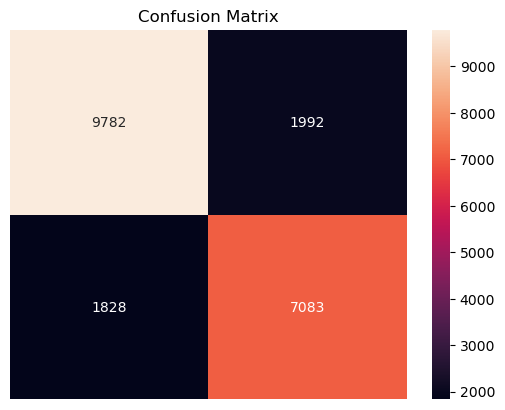

In [21]:
sns.heatmap(matrix , annot = True , fmt = 'd')
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['satisfaction_prediction']))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     11774
           1       0.78      0.79      0.79      8911

    accuracy                           0.82     20685
   macro avg       0.81      0.81      0.81     20685
weighted avg       0.82      0.82      0.82     20685



###### Giving custom arguments instead of Default Arguments

In [24]:
dt2 = DecisionTreeClassifier(splitter = 'random', max_depth = 8, min_samples_split = 55 , min_samples_leaf = 25)

In [29]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=55,
                       splitter='random')

In [32]:
# Model performance (model evaluation)
print("Training Score :",round(dt2.score(x_train,y_train),4)*100,"%")
print("Testing Score :",round(dt2.score(x_test,y_test['satisfaction_satisfied']),4)*100,"%")

Training Score : 86.21 %
Testing Score : 86.22999999999999 %
